In [1]:
import torch
print('Hello world')

x=torch.tensor([1,2,3,4])
print('CPU', x)

x=x.to('cuda')
print('GPU', x)

Hello world
CPU tensor([1, 2, 3, 4])
GPU tensor([1, 2, 3, 4], device='cuda:0')


In [4]:
from PIL import Image
import numpy as np

In [11]:
ls drive/MyDrive/python_image_recognition/data/coffee.jpg

drive/MyDrive/python_image_recognition/data/coffee.jpg


In [13]:
img_gray=Image.open('./drive/MyDrive/python_image_recognition/data/coffee.jpg')

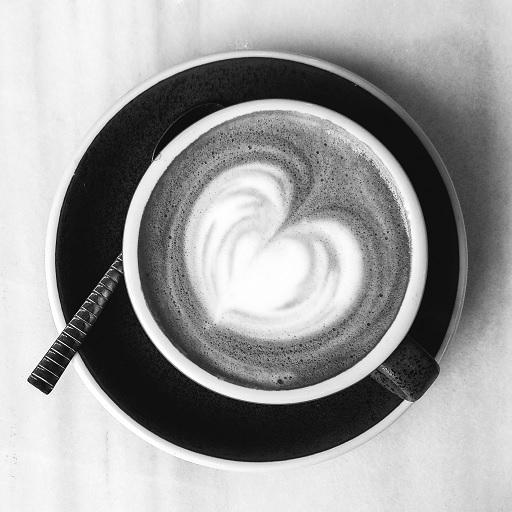

In [14]:
display(img_gray)

In [17]:
print('画像を保持する配列の形{}'.format(np.array(img_gray).shape))

画像を保持する配列の形(512, 512)


In [20]:
print('(0,0)の画素値: {}'.format(img_gray.getpixel((0, 0))))

(0,0)の画素値: 240


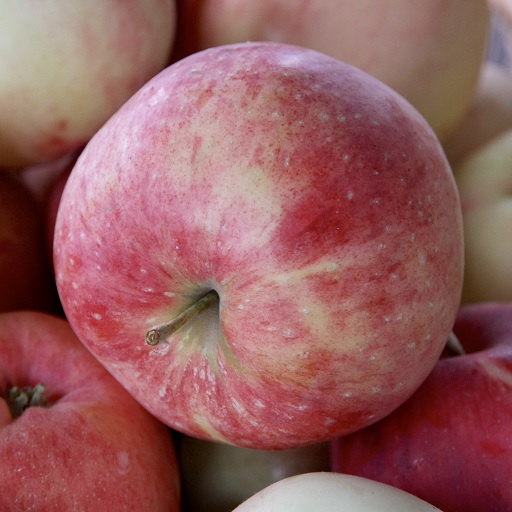

画像を保持する配列の形(512, 512, 3)
(0,0)の画素値: (197, 200, 191)


In [21]:
img_color=Image.open('./drive/MyDrive/python_image_recognition/data/apple.jpg')
display(img_color)
print('画像を保持する配列の形{}'.format(np.array(img_color).shape))
print('(0,0)の画素値: {}'.format(img_color.getpixel((0, 0))))

In [40]:
'''
ガウシアンカーネル
平滑化フィルタ；画像の各座標における画素値をその周辺の画素値を考慮して更新
カーネル；どのように周辺の値を収集するか、総和が１になるように正規化
'''
def generate_gaussian_kernel(
    kernel_width: int,
    kernel_height: int,
    sigma: float
):
    assert kernel_width%2==1 and kernel_height%2==1 #カーネルが中心を持つようにする

    kernel = np.empty((kernel_height, kernel_width))
    floorx, floory = kernel_width//2, kernel_height//2

    for y in range (-floory, floory+1): #カーネルの中心を(0,0)にして対称的なカーネルを作る
        for x in range (-floorx, floorx+1):
            kernel[y+floory, x+floorx] = np.exp(-(x**2+y**2)/(2*(sigma**2)))/np.sqrt(2*np.pi*(sigma**2))

    kernel = kernel/np.sum(kernel)

    return kernel

In [53]:
# 畳み込み演算
def convolution(
    img: Image.Image,
    kernel: np.ndarray,
    x: int,
    y: int
):
    width, height = img.size
    kernel_height, kernel_width = kernel.shape[:2]

    floorx, floory = kernel_width//2, kernel_height//2
    value = 0
    for y_kernel in range (-floory, floory+1):
        for x_kernel in range (-floorx, floorx+1):
            # カーネルが画像からはみ出る場合、端の座標を取得
            x_img, y_img = max(min(x+x_kernel, width-1), 0), max(min(y+y_kernel, height-1), 0)
            value += kernel[y_kernel+floory, x_kernel+floorx]*img.getpixel((x_img, y_img))

    return value

In [42]:
# フィルタの適用
def apply_filter(
    img: Image.Image,
    kernel: np.ndarray
):
    width, height = img.size

    img_filtered = Image.new(mode='L', size=(width, height)) # グレースケール
    for y in range(height):
        for x in range(width):
            filtered_value = convolution(img, kernel, x, y)
            img_filtered.putpixel((x, y), int(filtered_value))

    return img_filtered

In [18]:
kernel = generate_gaussian_kernel(kernel_width=5, kernel_height=5, sigma=1.3)
print('ガウシアンカーネル：{}'.format(kernel))

ガウシアンカーネル：[[0.0097565  0.02370077 0.03186045 0.02370077 0.0097565 ]
 [0.02370077 0.0575746  0.07739634 0.0575746  0.02370077]
 [0.03186045 0.07739634 0.10404229 0.07739634 0.03186045]
 [0.02370077 0.0575746  0.07739634 0.0575746  0.02370077]
 [0.0097565  0.02370077 0.03186045 0.02370077 0.0097565 ]]


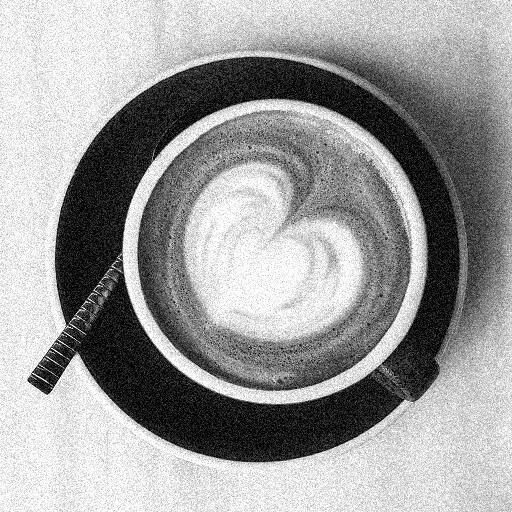

In [24]:
img = Image.open('./drive/MyDrive/python_image_recognition/data/coffee_noise.jpg')
display(img)

In [ ]:
img_filtered = apply_filter(img, kernel)
display(img_filtered)